In [2]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Case 1: Binomial Trees

Asha de Meij (i6254733)

**Task:** Consider the unit-linked contract with maturity guarantee that was discussed in the lecture.
Take the risk-free rate equal to r = 1%, the volatility of the investment fund o = 15% and
the final guaranteed amount at T = 10 equal to 100 (i.e., we have a contract with a 0%
guarantee).

Make a computer program where you increase the number of steps in the binomial tree from 4 to 100 and
make a graph of how the price of the contract as a function of the number of steps develops.

https://github.com/gokkayahmet/PRICING-DERIVATIVES-WITH-BINOMIAL-TREE-MODEL/blob/main/PRICING%20DERIVATIVES%20WITH%20BINOMIAL%20TREE%20MODEL.ipynb

https://www.kaggle.com/code/ahmetgokkaya/pricing-derivatives-with-binomial-tree-model#A-PUT-EXAMPLE

# Code

In [17]:
# initialization
r = 0.01
sigma = 0.15
T = 10 # maturity
guarantee = 100
n = 100

In [12]:
def get_optionPrice(r, sigma, T, guarantee, n):

    # Defining the parameters
    dt = T/n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    R_dt = np.exp(r*dt) # growth factor at each time step
    p = (R_dt - d) / (u - d) # Risk-neutral probability
    q = 1 - p


    # 1. calculate the stock price
    stockValues = np.zeros((n+1, n+1))
    stockValues[0,0] = 100 # Initial value
    
    for i in range(1,n+1):
        stockValues[i,0] = u*stockValues[i-1,0]
        for j in range(1,i+1):
           stockValues[i,j] = d*stockValues[i-1,j-1]


    # 2. Calculate the contract price: recursive procedure
    contractPrice = np.zeros((n+1, n+1))

    for i in range(n+1):
         contractPrice[n,i] = np.maximum(guarantee - stockValues[n,i], 0) 
         
    for i in range(n - 1, -1, -1):
        for j in range(i+1):
            contractPrice[i,j] = (1/R_dt)*(p*contractPrice[i+1,j] + q*contractPrice[i+1,j+1])

    initialPrice = contractPrice[0,0]
       
    return initialPrice

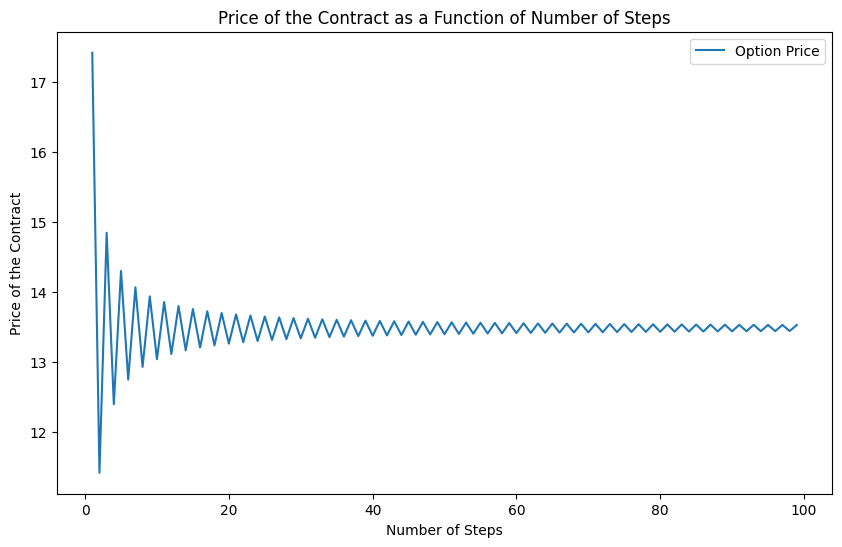

In [22]:
step_counts = range(1, 100)
prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]

plt.figure(figsize=(10, 6))
plt.plot(step_counts, prices, label='Option Price')
plt.xlabel('Number of Steps')
plt.ylabel('Price of the Contract')
plt.title('Price of the Contract as a Function of Number of Steps')
plt.legend()
plt.show()

**Questions:**
1. Can you explain the pattern that you see in the graph? To help you investigate the
convergence pattern, make an extra plot of the stock price S, in two nearest nodes
at T = 10, just above and below the guarantee level, as a function of the number of
steps.

2. When you keep the number of steps fixed (say 100), how does the price of the
contract change if you change r or o or T. Can you explain these changes?

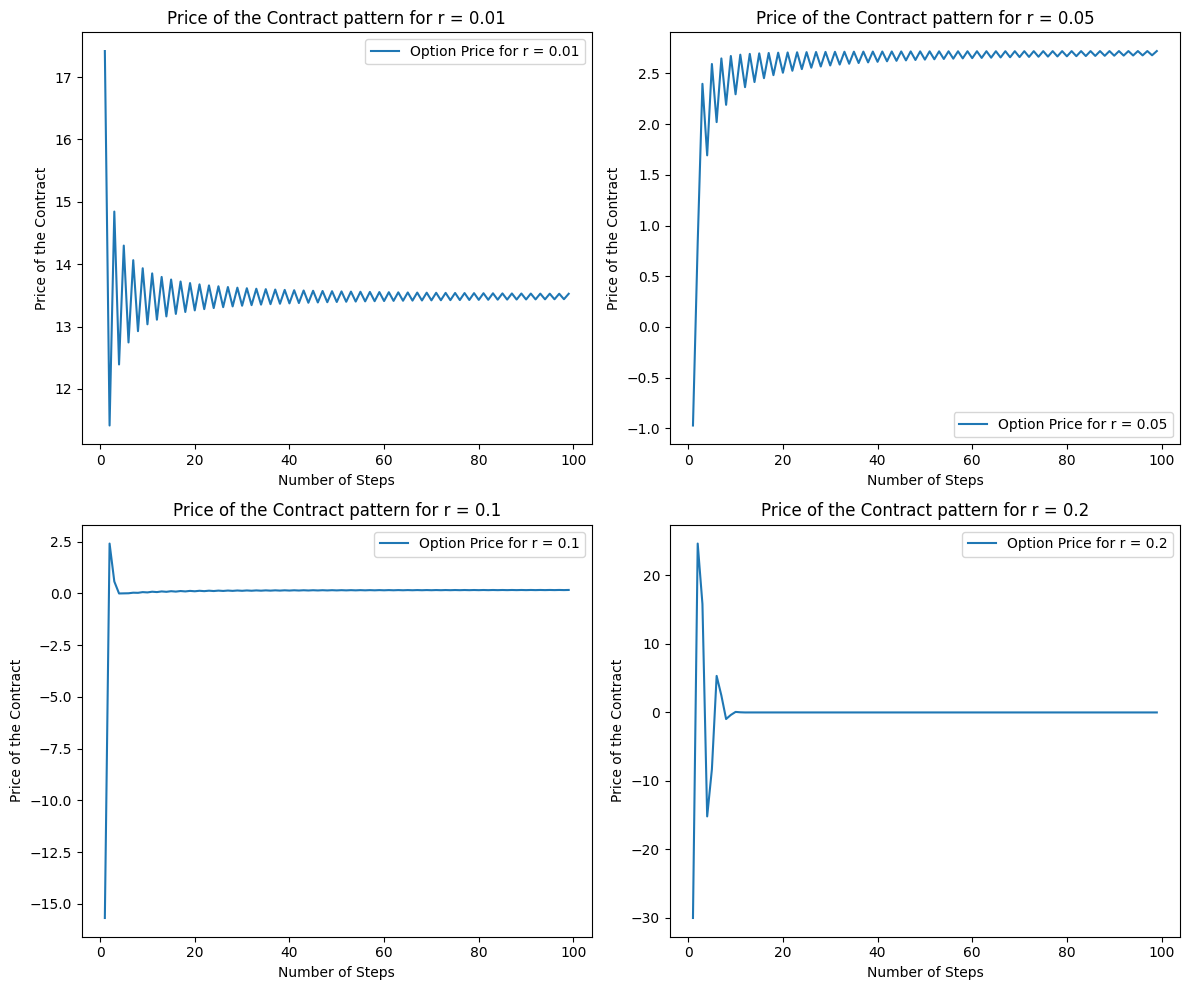

In [25]:
# First we can check for different numbers of r
r_values = [0.01, 0.05, 0.1, 0.2]  # Different values of interest rate for each subplot


# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Looping through each r value and generating the corresponding plot
for i, r in enumerate(r_values):
    # Calculating the option price for each r
    prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]
    
    axes[i].plot(step_counts, prices, label=f'Option Price for r = {r}')
    axes[i].set_xlabel('Number of Steps')
    axes[i].set_ylabel('Price of the Contract')
    axes[i].set_title(f'Price of the Contract pattern for r = {r}')
    axes[i].legend()

plt.tight_layout()
plt.show()

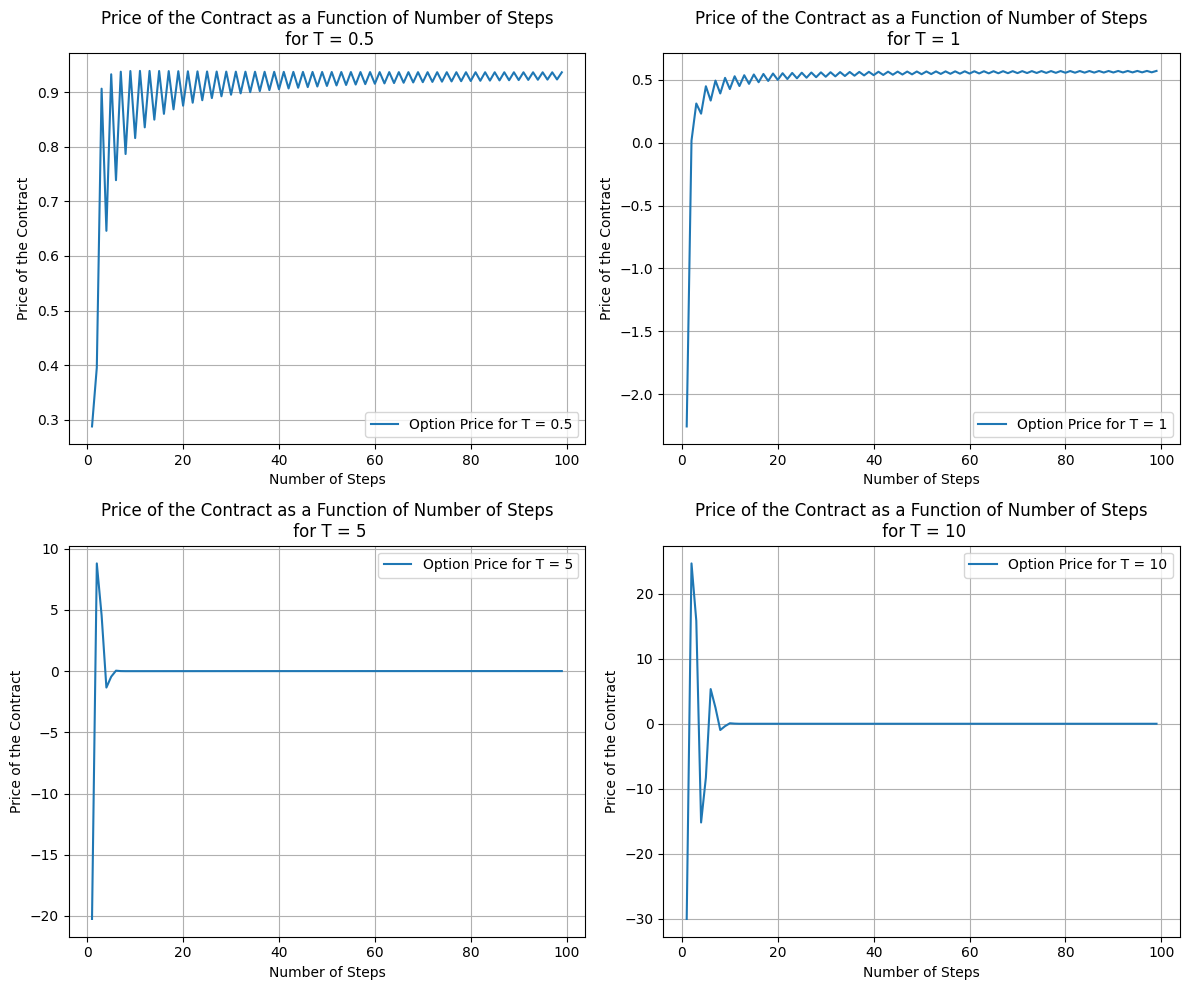

In [26]:
# Now we can do the same for different numbers of T
T_values = [0.5, 1, 5, 10]  

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Looping through each T value and generating the corresponding plot
for i, T in enumerate(T_values):
    # Calculate option prices as a function of number of steps for each T
    prices = [get_optionPrice(r, sigma, T, guarantee, n) for n in step_counts]
    
    # Plotting each result in its respective subplot
    axes[i].plot(step_counts, prices, label=f'Option Price for T = {T}')
    axes[i].set_xlabel('Number of Steps')
    axes[i].set_ylabel('Price of the Contract')
    axes[i].set_title(f'Price of the Contract as a Function of Number of Steps\n for T = {T}')
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

3. Can you modify your program to make it run faster (e.g., for a tree with 10 000
steps)? If so, what changes did you make compared to your initial code? Describe
how you have analysed the run-time of the code.

I previously used for loops (even worse nested for loops :D) to compute the stock as well as the option price. However, if i were to consider 10 000 time steps the matrices would grow enormously. This porblem can be solved using vector operations